# Оцінка та валідація моделей

## Вступ

У data mining створення моделей - це лише половина битви. Інша критична половина - визначення того, чи наші моделі дійсно хороші та надійні. Оцінка моделей допомагає нам відповісти на фундаментальні питання:

- Наскільки добре працює наша модель?
- Чи працюватиме вона на нових даних?
- Яку модель ми повинні вибрати серед кількох альтернатив?

Ця лекція охоплює техніки оцінки для різних типів завдань data mining, від навчання без вчителя (кластеризація) до навчання з вчителем (класифікація) та побудові асоціативних правил.

## 1. Метрики оцінки кластеризації

Кластеризація - одне з найскладніших завдань для оцінки, оскільки ми не маємо розмітки. Нам потрібно покладатися на метрики **внутрішньої валідації**, які оцінюють якість кластерів на основі самих даних.

### 1.1 Оцінка силуета

Оцінка силуета вимірює, наскільки об'єкт подібний до свого власного кластера порівняно з іншими кластерами. Він знаходиться в діапазоні від -1 до 1, де:

- **+1**: Об'єкт добре кластеризований (дуже подібний до свого кластера)
- **0**: Об'єкт на межі рішення або дуже близько до неї
- **-1**: Об'єкт погано кластеризований (більш подібний до інших кластерів)

**Математичне визначення:**
$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

Де:
- $a(i)$ = середня відстань від точки $i$ до інших точок у тому ж кластері
- $b(i)$ = середня відстань від точки $i$ до точок у найближчому кластері

### 1.2 Індекс Девіса-Болдіна

Індекс Девіса-Болдіна вимірює середню схожість між кластерами. **Нижчі значення вказують на кращу кластеризацію**.

**Математичне визначення:**
$$DB = \frac{1}{n} \sum_{i=1}^{n} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)$$

Де:
- $n$ = кількість кластерів
- $\sigma_i$ = середня відстань точок у кластері $i$ до його центроїда
- $d(c_i, c_j)$ = відстань між центроїдами кластерів $i$ та $j$

### 1.3 Пояснена дисперсія (для K-means)

Пояснена дисперсія вимірює, скільки загальної дисперсії в даних пояснюється кластеризацією. Вищі значення вказують на кращу кластеризацію.

**Математичне визначення:**
$$\text{Пояснена дисперсія} = \frac{\text{Міжкластерна дисперсія}}{\text{Загальна дисперсія}}$$

In [ ]:
# Let's implement clustering evaluation metrics with a practical example!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create sample datasets
print("Creating sample datasets for clustering evaluation...")
print("=" * 60)

# Dataset 1: Well-separated clusters
X1, y1 = make_blobs(n_samples=300, centers=4, cluster_std=1.5, random_state=42)

# Dataset 2: Overlapping clusters
X2, y2 = make_blobs(n_samples=300, centers=4, cluster_std=3.0, random_state=42)

# Dataset 3: Non-spherical clusters
X3, y3 = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=42)

print(f"Dataset 1 shape: {X1.shape}")
print(f"Dataset 2 shape: {X2.shape}")
print(f"Dataset 3 shape: {X3.shape}")
print("\nLet's visualize these datasets!")

Creating sample datasets for clustering evaluation...
Dataset 1 shape: (300, 2)
Dataset 2 shape: (300, 2)
Dataset 3 shape: (300, 2)

Let's visualize these datasets! 📊


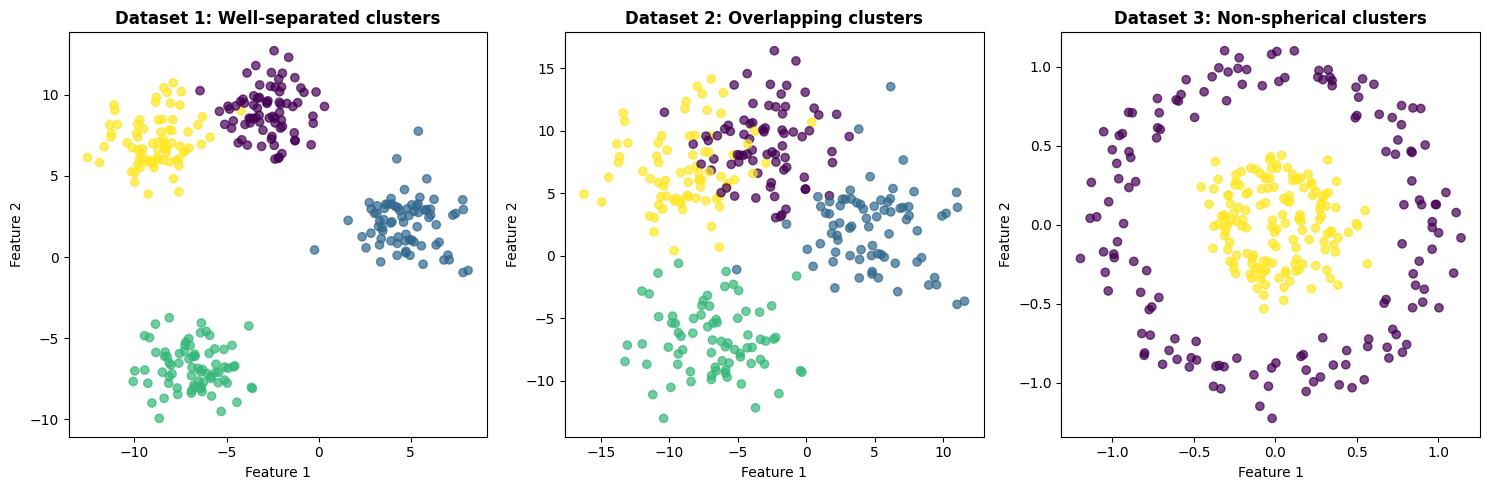

Now let's apply K-means clustering and evaluate the results! 🔍


In [ ]:
# Visualize the datasets
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Dataset 1: Well-separated clusters
axes[0].scatter(X1[:, 0], X1[:, 1], c=y1, cmap='viridis', alpha=0.7)
axes[0].set_title('Dataset 1: Well-separated clusters', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Plot Dataset 2: Overlapping clusters
axes[1].scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis', alpha=0.7)
axes[1].set_title('Dataset 2: Overlapping clusters', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Plot Dataset 3: Non-spherical clusters
axes[2].scatter(X3[:, 0], X3[:, 1], c=y3, cmap='viridis', alpha=0.7)
axes[2].set_title('Dataset 3: Non-spherical clusters', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("Now let's apply K-means clustering and evaluate the results!")


In [ ]:
# Function to evaluate clustering performance
def evaluate_clustering(X, y_true, k_range=range(2, 8)):
    """
    Evaluate clustering performance using multiple metrics
    """
    results = []
    
    for k in k_range:
        # Apply K-means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        y_pred = kmeans.fit_predict(X)
        
        # Calculate metrics
        silhouette = silhouette_score(X, y_pred)
        davies_bouldin = davies_bouldin_score(X, y_pred)
        
        # Calculate explained variance (inertia)
        inertia = kmeans.inertia_
        
        # Calculate explained variance ratio
        explained_variance = 1 - (inertia / np.var(X, axis=0).sum())
        
        results.append({
            'k': k,
            'silhouette': silhouette,
            'davies_bouldin': davies_bouldin,
            'inertia': inertia,
            'explained_variance': explained_variance
        })
    
    return results

# Evaluate all three datasets
print("Evaluating clustering performance...")
print("=" * 50)

datasets = [
    (X1, y1, "Well-separated clusters"),
    (X2, y2, "Overlapping clusters"),
    (X3, y3, "Non-spherical clusters")
]

all_results = {}

for i, (X, y_true, name) in enumerate(datasets):
    print(f"\n{name}:")
    print("-" * 30)
    
    results = evaluate_clustering(X, y_true)
    all_results[name] = results
    
    # Display results in a nice table
    print(f"{'K':<3} {'Silhouette':<12} {'Davies-Bouldin':<15} {'Explained Var':<15}")
    print("-" * 50)
    
    for result in results:
        print(f"{result['k']:<3} {result['silhouette']:<12.3f} {result['davies_bouldin']:<15.3f} {result['explained_variance']:<15.3f}")

print("\nKey Insights:")
print("- Higher Silhouette Score = Better clustering")
print("- Lower Davies-Bouldin Index = Better clustering") 
print("- Higher Explained Variance = Better clustering")


Evaluating clustering performance...

📊 Well-separated clusters:
------------------------------
K   Silhouette   Davies-Bouldin  Explained Var  
--------------------------------------------------
2   0.557        0.580           -146.590       
3   0.702        0.417           -39.609        
4   0.691        0.433           -17.235        
5   0.605        0.657           -15.444        
6   0.495        0.906           -13.732        
7   0.386        1.071           -12.092        

📊 Overlapping clusters:
------------------------------
K   Silhouette   Davies-Bouldin  Explained Var  
--------------------------------------------------
2   0.446        0.800           -171.496       
3   0.533        0.642           -76.332        
4   0.476        0.753           -54.486        
5   0.427        0.850           -47.062        
6   0.362        1.007           -41.576        
7   0.326        1.052           -36.171        

📊 Non-spherical clusters:
------------------------------
K 

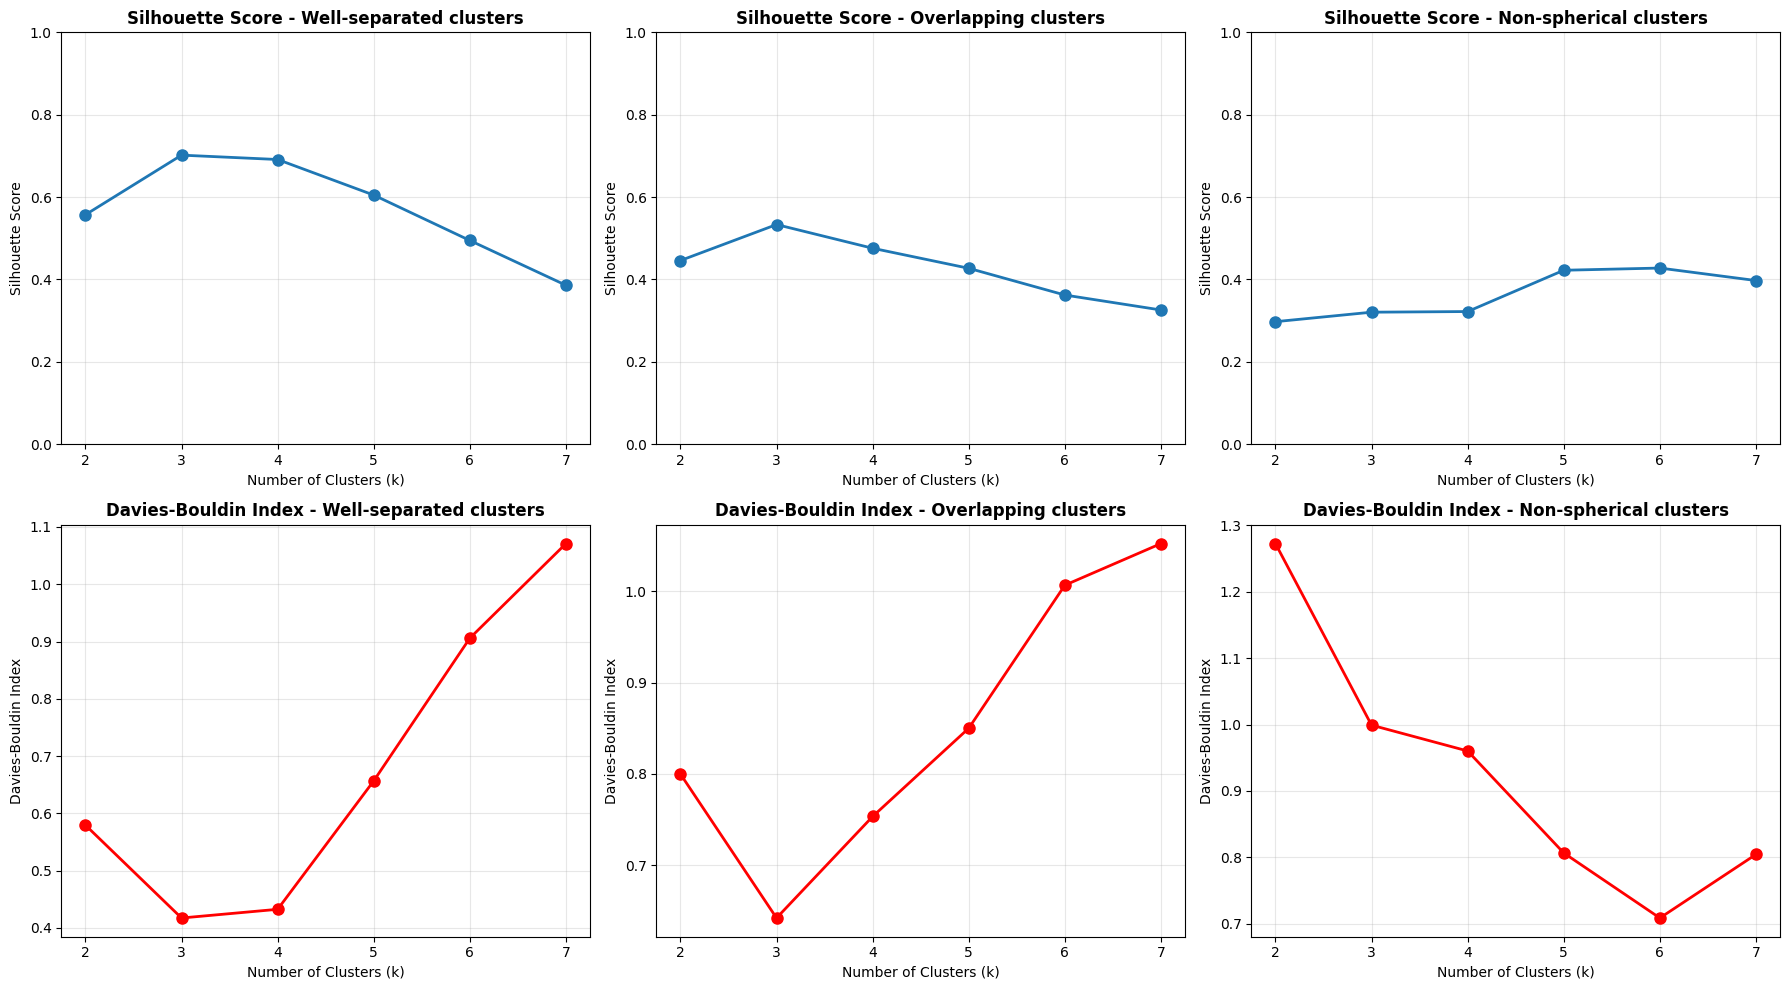

📈 Analysis:
- Silhouette Score: Look for the peak (highest value)
- Davies-Bouldin Index: Look for the valley (lowest value)
- The optimal k might differ between metrics - this is normal!


In [ ]:
# Visualize the evaluation metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot silhouette scores
for i, (name, results) in enumerate(all_results.items()):
    k_values = [r['k'] for r in results]
    silhouette_scores = [r['silhouette'] for r in results]
    
    axes[0, i].plot(k_values, silhouette_scores, 'o-', linewidth=2, markersize=8)
    axes[0, i].set_title(f'Silhouette Score - {name}', fontweight='bold')
    axes[0, i].set_xlabel('Number of Clusters (k)')
    axes[0, i].set_ylabel('Silhouette Score')
    axes[0, i].grid(True, alpha=0.3)
    axes[0, i].set_ylim(0, 1)

# Plot Davies-Bouldin index
for i, (name, results) in enumerate(all_results.items()):
    k_values = [r['k'] for r in results]
    db_scores = [r['davies_bouldin'] for r in results]
    
    axes[1, i].plot(k_values, db_scores, 'o-', linewidth=2, markersize=8, color='red')
    axes[1, i].set_title(f'Davies-Bouldin Index - {name}', fontweight='bold')
    axes[1, i].set_xlabel('Number of Clusters (k)')
    axes[1, i].set_ylabel('Davies-Bouldin Index')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Analysis:")
print("- Silhouette Score: Look for the peak (highest value)")
print("- Davies-Bouldin Index: Look for the valley (lowest value)")
print("- The optimal k might differ between metrics - this is normal!")


## 2. Оцінка асоціативних правил

Створення асоціативних правил знаходить цікаві зв'язки між елементами у великих наборах даних. На відміну від кластеризації, ми маємо кілька добре обґрунтованих метрик для оцінки якості асоціативних правил.

### 2.1 Базові метрики

**Підтримка (support)**: Частота правила в наборі даних
$$\text{Підтримка}(A \rightarrow B) = P(A \cup B) = \frac{|A \cup B|}{|D|}$$

**Впевненість (confidence)**: Ймовірність того, що B відбувається за умови A
$$\text{Впевненість}(A \rightarrow B) = P(B|A) = \frac{P(A \cup B)}{P(A)} = \frac{\text{Підтримка}(A \cup B)}{\text{Підтримка}(A)}$$

### 2.2 Розширені метрики

**Підйом (lift)**: Вимірює, наскільки більш ймовірно, що B відбувається, коли відбувається A
$$\text{Підйом}(A \rightarrow B) = \frac{\text{Впевненість}(A \rightarrow B)}{\text{Підтримка}(B)} = \frac{P(B|A)}{P(B)}$$

- **Підйом = 1**: A та B незалежні
- **Підйом > 1**: Позитивна асоціація (A збільшує ймовірність B)
- **Підйом < 1**: Негативна асоціація (A зменшує ймовірність B)

**Переконання (conviction)**: Вимірює очікувану частоту правила, якщо A та B були б незалежними
$$\text{Переконання}(A \rightarrow B) = \frac{1 - \text{Підтримка}(B)}{1 - \text{Впевненість}(A \rightarrow B)}$$

- **Переконання = 1**: A та B незалежні
- **Переконання > 1**: Сильна позитивна асоціація
- **Переконання = ∞**: Ідеальна позитивна асоціація (впевненість = 1)

In [ ]:
# Let's implement association rule evaluation with a market basket example! 🛒

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample market basket dataset
print("Creating a sample market basket dataset...")
print("=" * 50)

# Sample transactions (each list represents a customer's basket)
transactions = [
    ['bread', 'milk', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'eggs', 'cheese'],
    ['bread', 'milk', 'butter'],
    ['eggs', 'cheese', 'yogurt'],
    ['bread', 'jam', 'honey'],
    ['milk', 'cheese', 'yogurt'],
    ['bread', 'milk', 'eggs', 'butter'],
    ['eggs', 'yogurt', 'fruits'],
    ['bread', 'milk', 'jam', 'honey'],
    ['cheese', 'yogurt', 'fruits'],
    ['bread', 'eggs', 'butter', 'jam'],
    ['milk', 'cheese', 'fruits'],
    ['bread', 'milk', 'yogurt'],
    ['eggs', 'butter', 'jam', 'honey']
]

print(f"Number of transactions: {len(transactions)}")
print(f"Sample transactions:")
for i, transaction in enumerate(transactions[:5]):
    print(f"  Transaction {i+1}: {transaction}")

# Convert to binary matrix format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(f"\nBinary matrix shape: {df.shape}")
print("Binary matrix (first 5 rows):")
print(df.head())

Creating a sample market basket dataset...
Number of transactions: 15
Sample transactions:
  Transaction 1: ['bread', 'milk', 'eggs']
  Transaction 2: ['bread', 'butter', 'jam']
  Transaction 3: ['milk', 'eggs', 'cheese']
  Transaction 4: ['bread', 'milk', 'butter']
  Transaction 5: ['eggs', 'cheese', 'yogurt']

Binary matrix shape: (15, 9)
Binary matrix (first 5 rows):
   bread  butter  cheese   eggs  fruits  honey    jam   milk  yogurt
0   True   False   False   True   False  False  False   True   False
1   True    True   False  False   False  False   True  False   False
2  False   False    True   True   False  False  False   True   False
3   True    True   False  False   False  False  False   True   False
4  False   False    True   True   False  False  False  False    True


In [ ]:
# Mine frequent itemsets and generate association rules
print("\nMining frequent itemsets and association rules...")
print("=" * 55)

# Find frequent itemsets with minimum support of 0.2 (20%)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
print(f"Found {len(frequent_itemsets)} frequent itemsets")
print("\nFrequent itemsets:")
print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(f"\nGenerated {len(rules)} association rules")
print("\nAssociation rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].round(3))

# Let's analyze the quality of these rules
print("\nRule Quality Analysis:")
print("-" * 30)

for idx, rule in rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])
    support = rule['support']
    confidence = rule['confidence']
    lift = rule['lift']
    conviction = rule['conviction']
    
    print(f"\nRule: {antecedents} → {consequents}")
    print(f"  Support: {support:.3f} ({support*100:.1f}% of transactions)")
    print(f"  Confidence: {confidence:.3f} ({confidence*100:.1f}% of {antecedents} transactions)")
    print(f"  Lift: {lift:.3f} ({'positive' if lift > 1 else 'negative' if lift < 1 else 'independent'} association)")
    print(f"  Conviction: {conviction:.3f} ({'strong' if conviction > 1 else 'weak'} association)")


Mining frequent itemsets and association rules...
Found 19 frequent itemsets

Frequent itemsets:
     support          itemsets
0   0.533333           (bread)
1   0.333333          (butter)
2   0.333333          (cheese)
3   0.466667            (eggs)
4   0.200000          (fruits)
5   0.200000           (honey)
6   0.333333             (jam)
7   0.533333            (milk)
8   0.333333          (yogurt)
9   0.266667   (butter, bread)
10  0.200000     (eggs, bread)
11  0.266667      (jam, bread)
12  0.333333     (milk, bread)
13  0.200000    (butter, eggs)
14  0.200000     (butter, jam)
15  0.200000    (milk, cheese)
16  0.200000  (cheese, yogurt)
17  0.200000      (eggs, milk)
18  0.200000      (jam, honey)

Generated 14 association rules

Association rules:
   antecedents consequents  support  confidence   lift  conviction
0     (butter)     (bread)    0.267       0.800  1.500       2.333
1      (bread)    (butter)    0.267       0.500  1.500       1.333
2        (jam)     (bread)   

## 3. Перехресна валідація та розділення на навчальну та тестову вибірки

Коли існують розмічені дані (навчання з вчителем), ми можемо використовувати більш складні техніки оцінки. Ключовий принцип - **ніколи не оцінювати на тих самих даних, що використовувалися для навчання**.

### 3.1 Проблема з оцінкою на навчальній вибірці

Оцінка моделі на її навчальних даних дає надто оптимістичну оцінку продуктивності. Це тому, що модель вже "бачила" та вивчила ці дані.

### 3.2 Розділення на навчальну та тестову вибірки

Найпростіший підхід - розділити дані на дві частини:

- **Навчальна вибірка**: Використовується для навчання моделі (зазвичай 70-80% даних)
- **Тестова вибірка**: Використовується для оцінки моделі (зазвичай 20-30% даних)

**Важливо**: Тестова вибірка ніколи не повинна використовуватися під час розробки моделі або налаштування гіперпараметрів!

### 3.3 Перехресна валідація

Перехресна валідація надає більш надійну оцінку, використовуючи кілька поділів на навчальну-тестову вибірки:

**k-кратна перехресна валідація (k-fold cross validation)**:
1. Розділити дані на k рівних частин (folds)
2. Навчати на k-1 вибірках, тестувати на решті
3. Повторити k разів, кожного разу використовуючи різну вибірку як тестову
4. Усереднити результати по всіх k ітераціях

![Cross Validation](images/10.0-cross-validation.svg)

[Джерело зображення](https://uk.wikipedia.org/wiki/%D0%A4%D0%B0%D0%B9%D0%BB:K-fold_cross_validation_EN.svg)

**Переваги перехресної валідації**:
- Більш надійна оцінка продуктивності
- Зменшує дисперсію в оцінках продуктивності
- Краще використання обмежених даних
- Допомагає виявити перенавчання

### 3.4 Перенавчання та узагальнення

**Перенавчання**: Модель працює добре на навчальних даних, але погано на нових даних
- Висока точність на вибірці для навчання, низька точність на вибірці для тестування
- Модель запам'ятала навчальні приклади замість вивчення патернів

**Узагальнення**: Модель працює добре як на навчальних, так і на нових даних
- Подібна точність на навчальних та тестових даних
- Модель вивчила загальні патерни

In [ ]:
# Let's demonstrate overfitting vs generalization with a practical example! 🎯

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Create a classification dataset
print("Creating a classification dataset to demonstrate overfitting...")
print("=" * 65)

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X.shape[1]}")

# Let's compare different models and their tendency to overfit
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree (max_depth=3)': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Decision Tree (max_depth=10)': DecisionTreeClassifier(max_depth=10, random_state=42),
    'Decision Tree (no limit)': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

print("\nComparing model performance on training vs test data:")
print("=" * 60)
print(f"{'Model':<30} {'Train Acc':<12} {'Test Acc':<12} {'Difference':<12}")
print("-" * 60)

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    difference = train_acc - test_acc
    
    results[name] = {
        'train_acc': train_acc,
        'test_acc': test_acc,
        'difference': difference
    }
    
    print(f"{name:<30} {train_acc:<12.3f} {test_acc:<12.3f} {difference:<12.3f}")

print("\nAnalysis:")
print("- Large difference = Overfitting (model memorized training data)")
print("- Small difference = Good generalization")
print("- Very low test accuracy = Underfitting (model too simple)")

Creating a classification dataset to demonstrate overfitting...
Training set size: 700 samples
Test set size: 300 samples
Number of features: 20

🔍 Comparing model performance on training vs test data:
Model                          Train Acc    Test Acc     Difference  
------------------------------------------------------------
Logistic Regression            0.814        0.820        -0.006      
Decision Tree (max_depth=3)    0.820        0.770        0.050       
Decision Tree (max_depth=10)   0.997        0.780        0.217       
Decision Tree (no limit)       1.000        0.797        0.203       
Random Forest                  1.000        0.887        0.113       

📊 Analysis:
- Large difference = Overfitting (model memorized training data)
- Small difference = Good generalization
- Very low test accuracy = Underfitting (model too simple)



🔄 Cross-Validation Demonstration:
5-Fold Cross-Validation Scores: [0.9        0.92142857 0.89285714 0.88571429 0.92857143]
Mean CV Score: 0.906 (+/- 0.033)
CV Score Range: 0.886 - 0.929

Single Train-Test Split Score: 0.887
Difference: 0.019


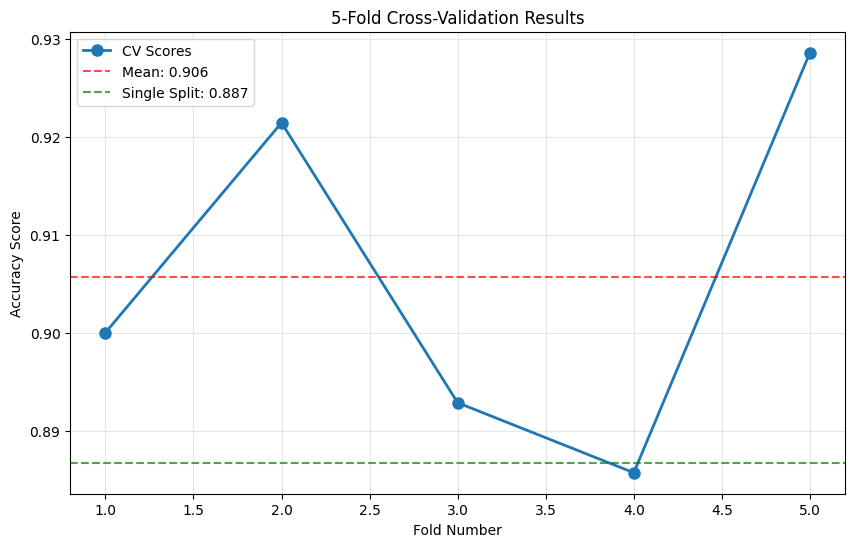


💡 Cross-Validation Benefits:
- More reliable performance estimate
- Reduces dependency on a single random split
- Helps identify if model is stable across different data splits


In [ ]:
# Demonstrate cross-validation
print("\nCross-Validation Demonstration:")
print("=" * 40)

# Use the best performing model (Random Forest) for cross-validation
best_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"5-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
print(f"CV Score Range: {cv_scores.min():.3f} - {cv_scores.max():.3f}")

# Compare with single train-test split
best_model.fit(X_train, y_train)
single_split_score = best_model.score(X_test, y_test)

print(f"\nSingle Train-Test Split Score: {single_split_score:.3f}")
print(f"Difference: {abs(cv_scores.mean() - single_split_score):.3f}")

# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, 'o-', linewidth=2, markersize=8, label='CV Scores')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {cv_scores.mean():.3f}')
plt.axhline(y=single_split_score, color='green', linestyle='--', alpha=0.7, label=f'Single Split: {single_split_score:.3f}')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.title('5-Fold Cross-Validation Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nCross-Validation Benefits:")
print("- More reliable performance estimate")
print("- Reduces dependency on a single random split")
print("- Helps identify if model is stable across different data splits")

## 4. Метрики класифікації

Для завдань класифікації нам потрібні більш складні метрики, ніж просто точність, особливо при роботі з незбалансованими наборами даних або коли різні типи помилок мають різну вартість.

### 4.1 Матриця плутанини (confusion matrix)

Матриця плутанини є основою для більшості метрик класифікації. Вона порівнює фактичну та прогнозовану класифікацію:

|                | Прогнозовано негативний | Прогнозовано позитивний |
|----------------|------------------------|------------------------|
| **Фактично негативний** | Істинно негативний (TN) | Хибно позитивний (FP) |
| **Фактично позитивний** | Хибно негативний (FN) | Істинно позитивний (TP) |

### 4.2 Ключові метрики класифікації

**Точність (accuracy)**: Загальна правильність
$$\text{Точність} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Влучність (precision)**: З усіх позитивних прогнозів, скільки було правильних?
$$\text{Влучність} = \frac{TP}{TP + FP}$$

**Повнота (Чутливість, sensitivity, recall, true positive rate)**: З усіх фактичних позитивних, скільки ми виявили?
$$\text{Повнота} = \frac{TP}{TP + FN}$$

**F1-бал (F1-score)**: Гармонійне середнє влучності та повноти
$$\text{F1-бал} = 2 \times \frac{\text{Влучність} \times \text{Повнота}}{\text{Влучність} + \text{Повнота}}$$

![Confusion Matrix](images/10.1-confusion-matrix.png)

[Джерело зображення](https://shuzhanfan.github.io/2018/02/model-evaluation-metrics/)

### 4.3 Коли використовувати яку метрику?

- **Точність**: Коли класи збалансовані та всі помилки однаково дорогі
- **Влучність**: Коли хибно позитивні дорогі (наприклад, виявлення спаму)
- **Повнота**: Коли хибно негативні дорогі (наприклад, медична діагностика)
- **F1-бал**: Коли вам потрібен баланс між влучністю та повнотою

In [ ]:
# Let's demonstrate classification metrics with a comprehensive example!

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.datasets import make_classification
import seaborn as sns

# Create an imbalanced dataset to better demonstrate the metrics
print("Creating an imbalanced classification dataset...")
print("=" * 50)

X_imb, y_imb = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                                  n_redundant=5, n_classes=2, weights=[0.8, 0.2], 
                                  random_state=42)

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42, stratify=y_imb
)

print(f"Class distribution in training set: {np.bincount(y_train_imb)}")
print(f"Class distribution in test set: {np.bincount(y_test_imb)}")
print(f"Class 0: {np.bincount(y_test_imb)[0]} samples ({np.bincount(y_test_imb)[0]/len(y_test_imb)*100:.1f}%)")
print(f"Class 1: {np.bincount(y_test_imb)[1]} samples ({np.bincount(y_test_imb)[1]/len(y_test_imb)*100:.1f}%)")

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_imb, y_train_imb)

# Make predictions
y_pred = model.predict(X_test_imb)
y_pred_proba = model.predict_proba(X_test_imb)[:, 1]

print(f"\nModel Performance Analysis:")
print("=" * 35)

# Calculate and display all metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_imb, y_pred)
precision = precision_score(y_test_imb, y_pred)
recall = recall_score(y_test_imb, y_pred)
f1 = f1_score(y_test_imb, y_pred)

print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")

# Detailed classification report
print(f"\nDetailed Classification Report:")
print("-" * 40)
print(classification_report(y_test_imb, y_pred, target_names=['Class 0', 'Class 1']))


Creating an imbalanced classification dataset...
Class distribution in training set: [559 141]
Class distribution in test set: [240  60]
Class 0: 240 samples (80.0%)
Class 1: 60 samples (20.0%)

🎯 Model Performance Analysis:
Accuracy:  0.887
Precision: 0.964
Recall:    0.450
F1-Score:  0.614

📋 Detailed Classification Report:
----------------------------------------
              precision    recall  f1-score   support

     Class 0       0.88      1.00      0.93       240
     Class 1       0.96      0.45      0.61        60

    accuracy                           0.89       300
   macro avg       0.92      0.72      0.77       300
weighted avg       0.90      0.89      0.87       300



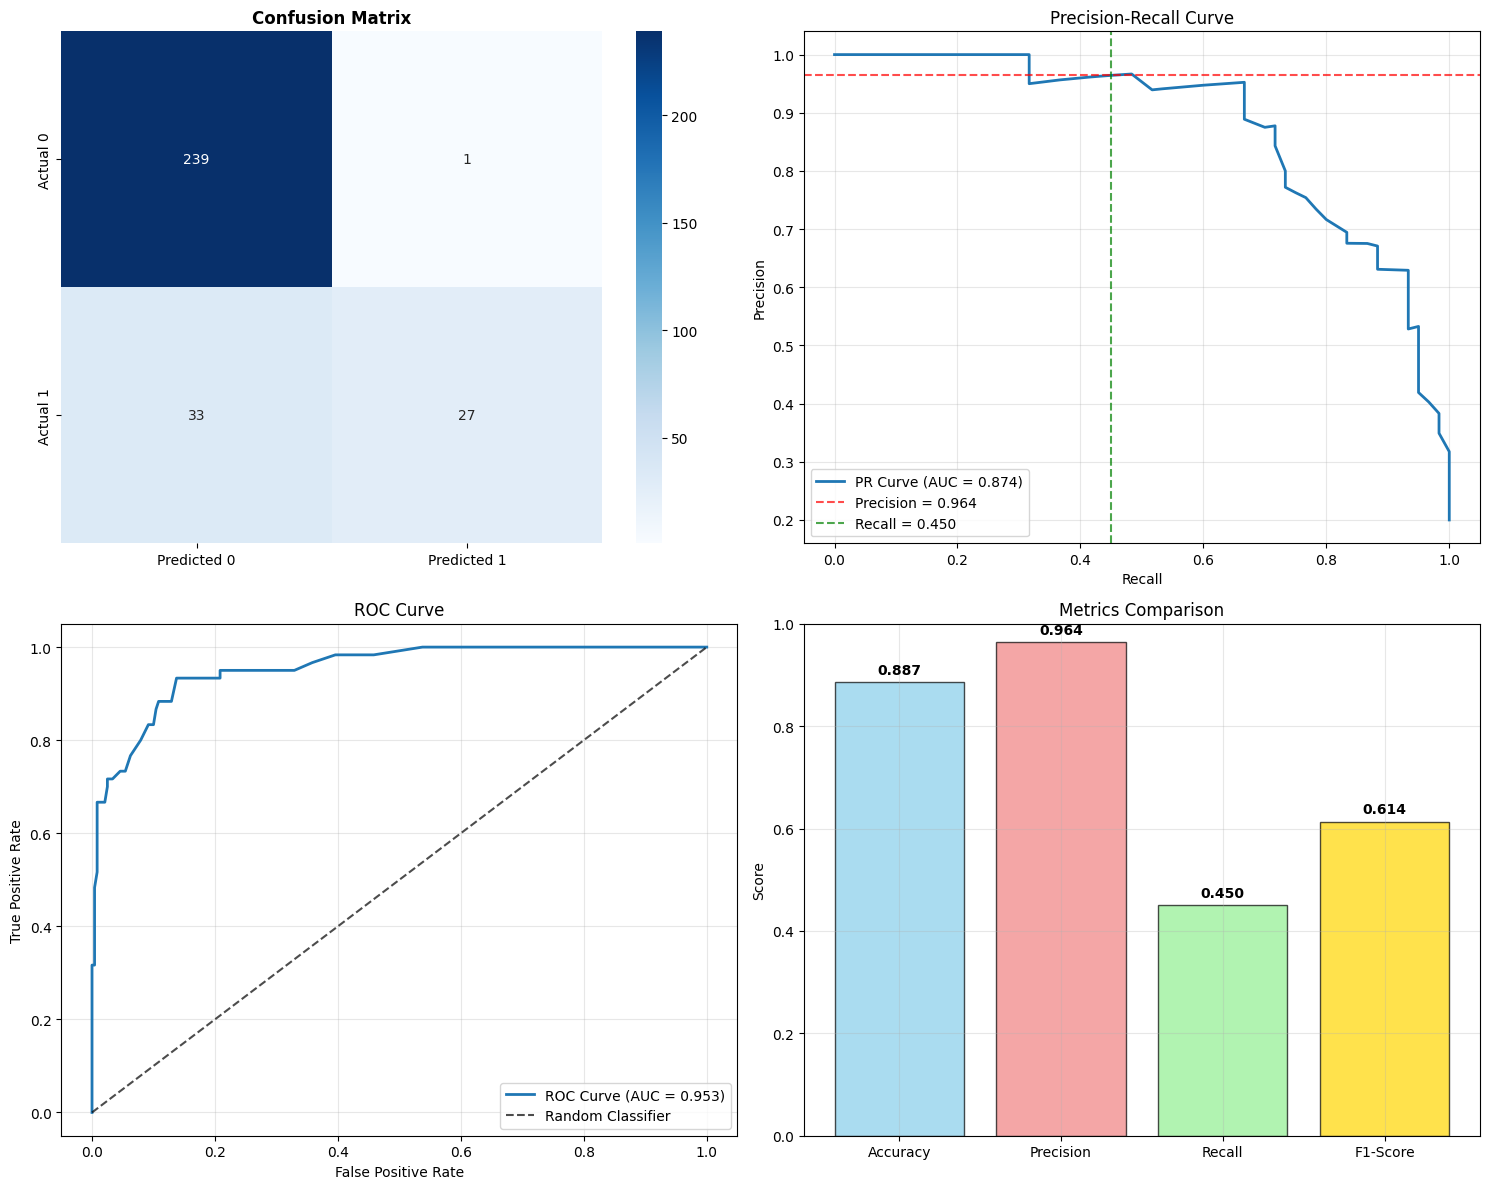

📈 Key Insights:
- Confusion Matrix shows the breakdown of correct/incorrect predictions
- PR Curve is better for imbalanced datasets
- ROC Curve shows the trade-off between sensitivity and specificity
- All metrics together give a complete picture of model performance


In [ ]:
# Visualize the confusion matrix and metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix
cm = confusion_matrix(y_test_imb, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix', fontweight='bold')

# Precision-Recall Curve
precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test_imb, y_pred_proba)
pr_auc = auc(recall_curve, precision_curve)

axes[0, 1].plot(recall_curve, precision_curve, linewidth=2, label=f'PR Curve (AUC = {pr_auc:.3f})')
axes[0, 1].axhline(y=precision, color='red', linestyle='--', alpha=0.7, label=f'Precision = {precision:.3f}')
axes[0, 1].axvline(x=recall, color='green', linestyle='--', alpha=0.7, label=f'Recall = {recall:.3f}')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test_imb, y_pred_proba)
roc_auc = auc(fpr, tpr)

axes[1, 0].plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.7, label='Random Classifier')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

bars = axes[1, 1].bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Metrics Comparison')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, values):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Key Insights:")
print("- Confusion Matrix shows the breakdown of correct/incorrect predictions")
print("- PR Curve is better for imbalanced datasets")
print("- ROC Curve shows the trade-off between sensitivity and specificity")
print("- All metrics together give a complete picture of model performance")
